In [ ]:
#importando bibliotecas
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (cohen_kappa_score, confusion_matrix, accuracy_score,
precision_score, recall_score, f1_score,roc_auc_score, roc_curve, auc, r2_score,classification_report)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Carregando DataFrame
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

#Exibindo as primeiras linhas do DF
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Variáveis do DataFrame

*   Pregnancies = gravidez
*   Glucose = glicose
*   BloodPressure = diastolica
*   SkinThickness = triceps
*   Insulin = insulina
*   BMI = IMC(Indice de Massa Corporal)
*   DiabetesPedigreeFunction = historico
*   Age = idade
*   Outcome = resultado





In [ ]:
#Renomeando o titulo das colunas
df.rename(columns={'Pregnancies': 'gravidez', 'Glucose' : 'glicose', 'BloodPressure' : 'diastolica', 'SkinThickness' : 'triceps', 'Insulin' : 'insulina', 'BMI' : 'IMC',
                    'DiabetesPedigreeFunction' : 'historico', 'Age' : 'idade', 'Outcome' : 'resultado' }, inplace=True)
df.head()


,gravidez,glicose,diastolica,triceps,insulina,IMC,historico,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Estatisticas do DataFrame


In [ ]:

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gravidez    768 non-null    int64  
 1   glicose     768 non-null    int64  
 2   diastolica  768 non-null    int64  
 3   triceps     768 non-null    int64  
 4   insulina    768 non-null    int64  
 5   IMC         768 non-null    float64
 6   historico   768 non-null    float64
 7   idade       768 non-null    int64  
 8   resultado   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,gravidez,glicose,diastolica,triceps,insulina,IMC,historico,idade,resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
## Há valores como a pressão diastolica e o nível de glicose que é fisicamente impossível serem 0, sendo assim substituimos por NaN
df_copia = df.copy(deep = True)
df_copia[['glicose','diastolica','triceps','insulina','IMC']] = df_copia[['glicose','diastolica','triceps','insulina','IMC']].replace(0,np.NaN)

## Exibindo os valores NaN
print(df_copia.isnull().sum())

gravidez        0
glicose         5
diastolica     35
triceps       227
insulina      374
IMC            11
historico       0
idade           0
resultado       0
dtype: int64


#### Análise da distrbuição dos dados

In [ ]:
# Assimetria dos dados
# Negativo (-) Assimétrico a esquerda
# Positivo (+) Assimétrico a direita
# Valores 0 são simétricos
df.skew()

gravidez      0.901674
glicose       0.173754
diastolica   -1.843608
triceps       0.109372
insulina      2.272251
IMC          -0.428982
historico     1.919911
idade         1.129597
resultado     0.635017
dtype: float64

In [ ]:
df.kurt()

gravidez      0.159220
glicose       0.640780
diastolica    5.180157
triceps      -0.520072
insulina      7.214260
IMC           3.290443
historico     5.594954
idade         0.643159
resultado    -1.600930
dtype: float64

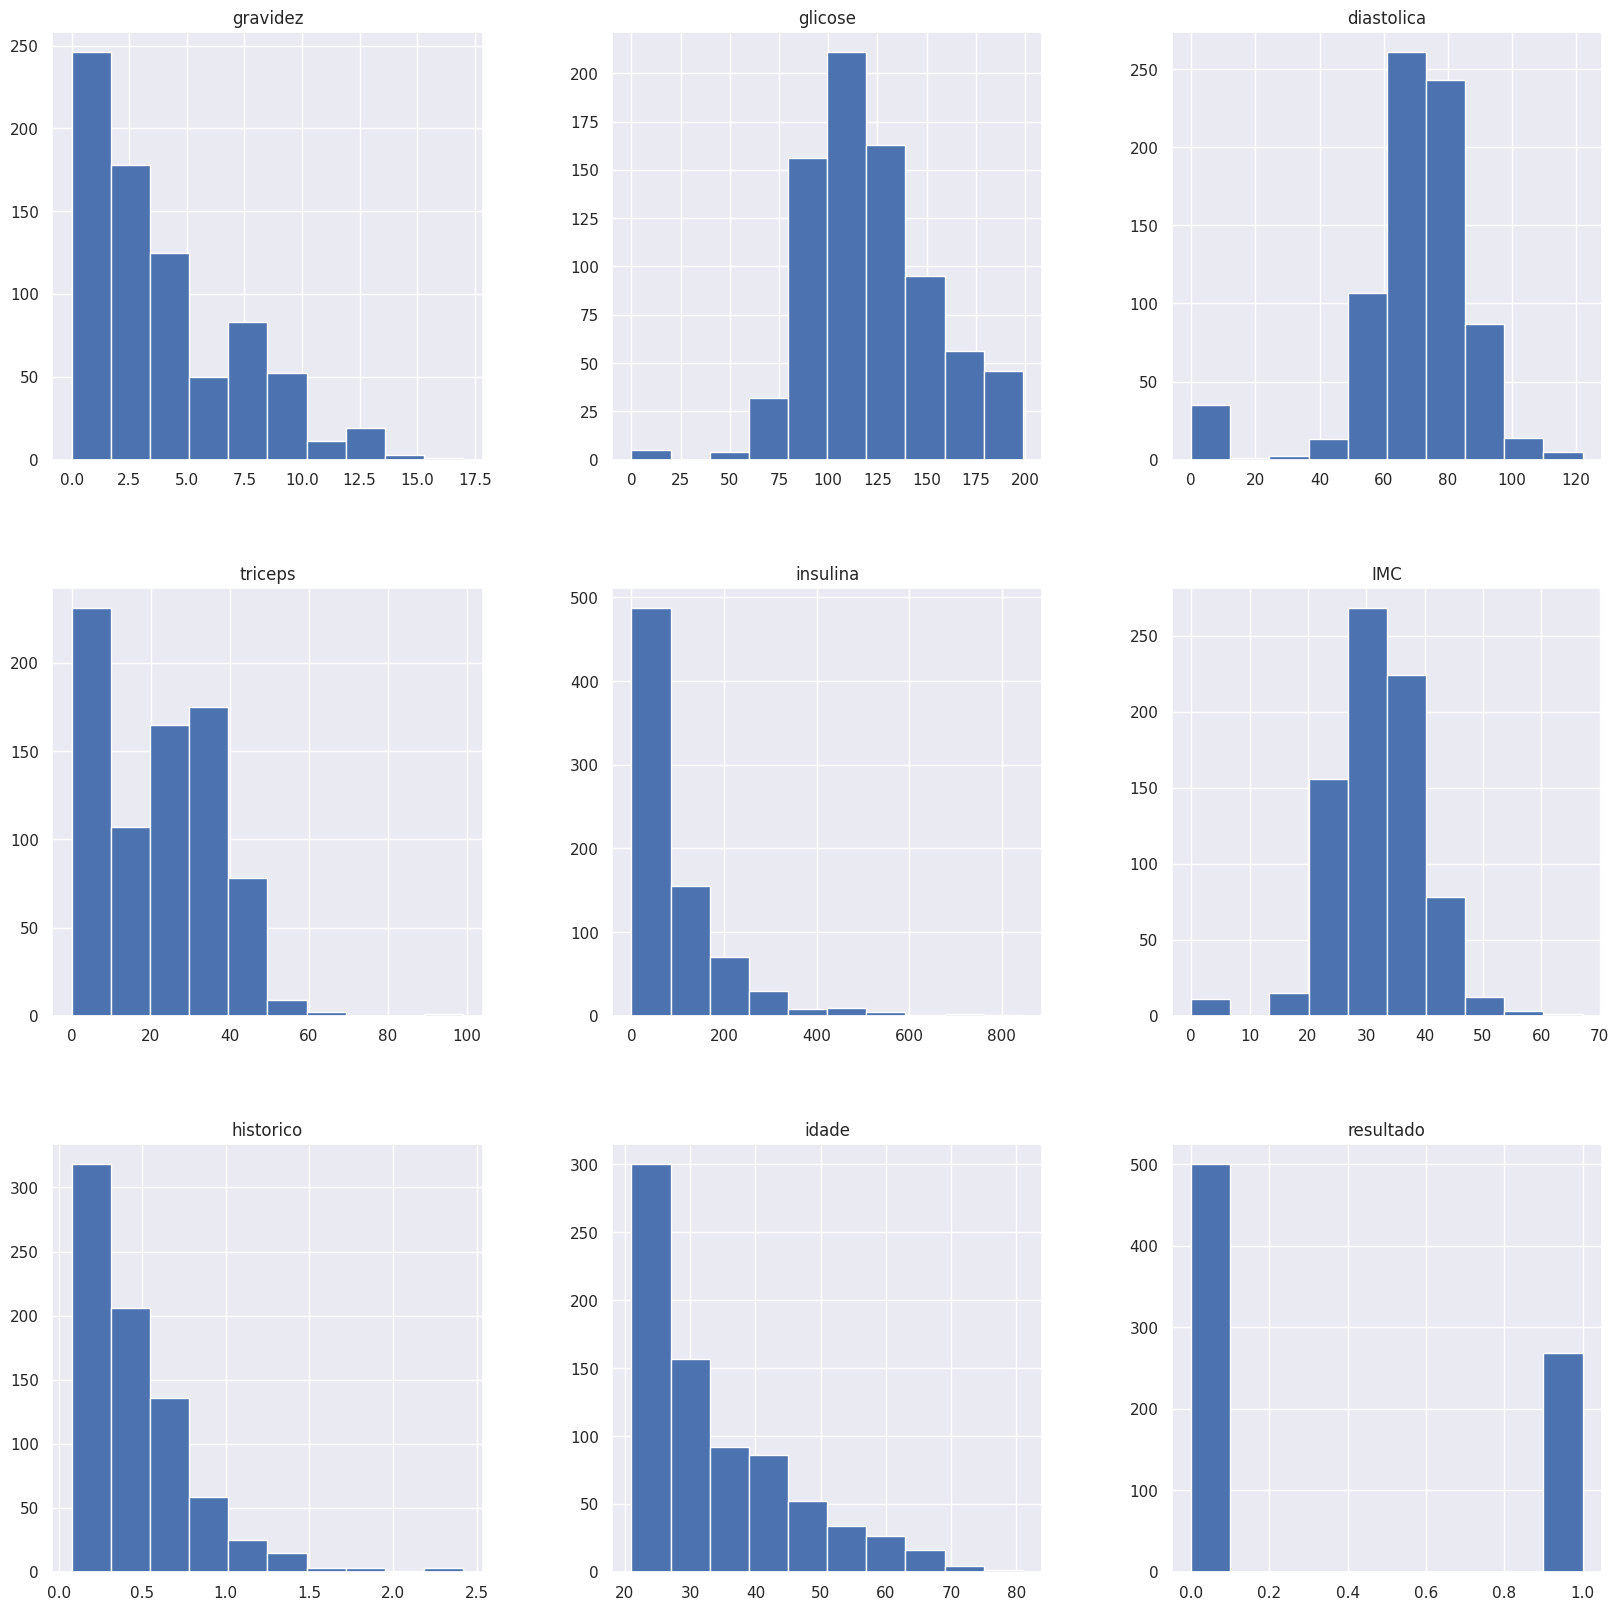

In [ ]:
p = df.hist(figsize = (20,20))

### Atribuindo valores aos campos que estão como NaN

In [ ]:
##Atribuindo média a colunas que estão com os valores mais equilibrados(próximos a simetria)
df_copia['glicose'].fillna(df_copia['glicose'].mean(), inplace = True)
df_copia['diastolica'].fillna(df_copia['diastolica'].mean(), inplace = True)
df_copia['IMC'].fillna(df_copia['IMC'].mean(), inplace = True)

##Atribuindo mediana a valores com grande quantidade de NaN e desequilibrados
df_copia['triceps'].fillna(df_copia['triceps'].median(), inplace = True)
df_copia['insulina'].fillna(df_copia['insulina'].median(), inplace = True)


## NaN removidos



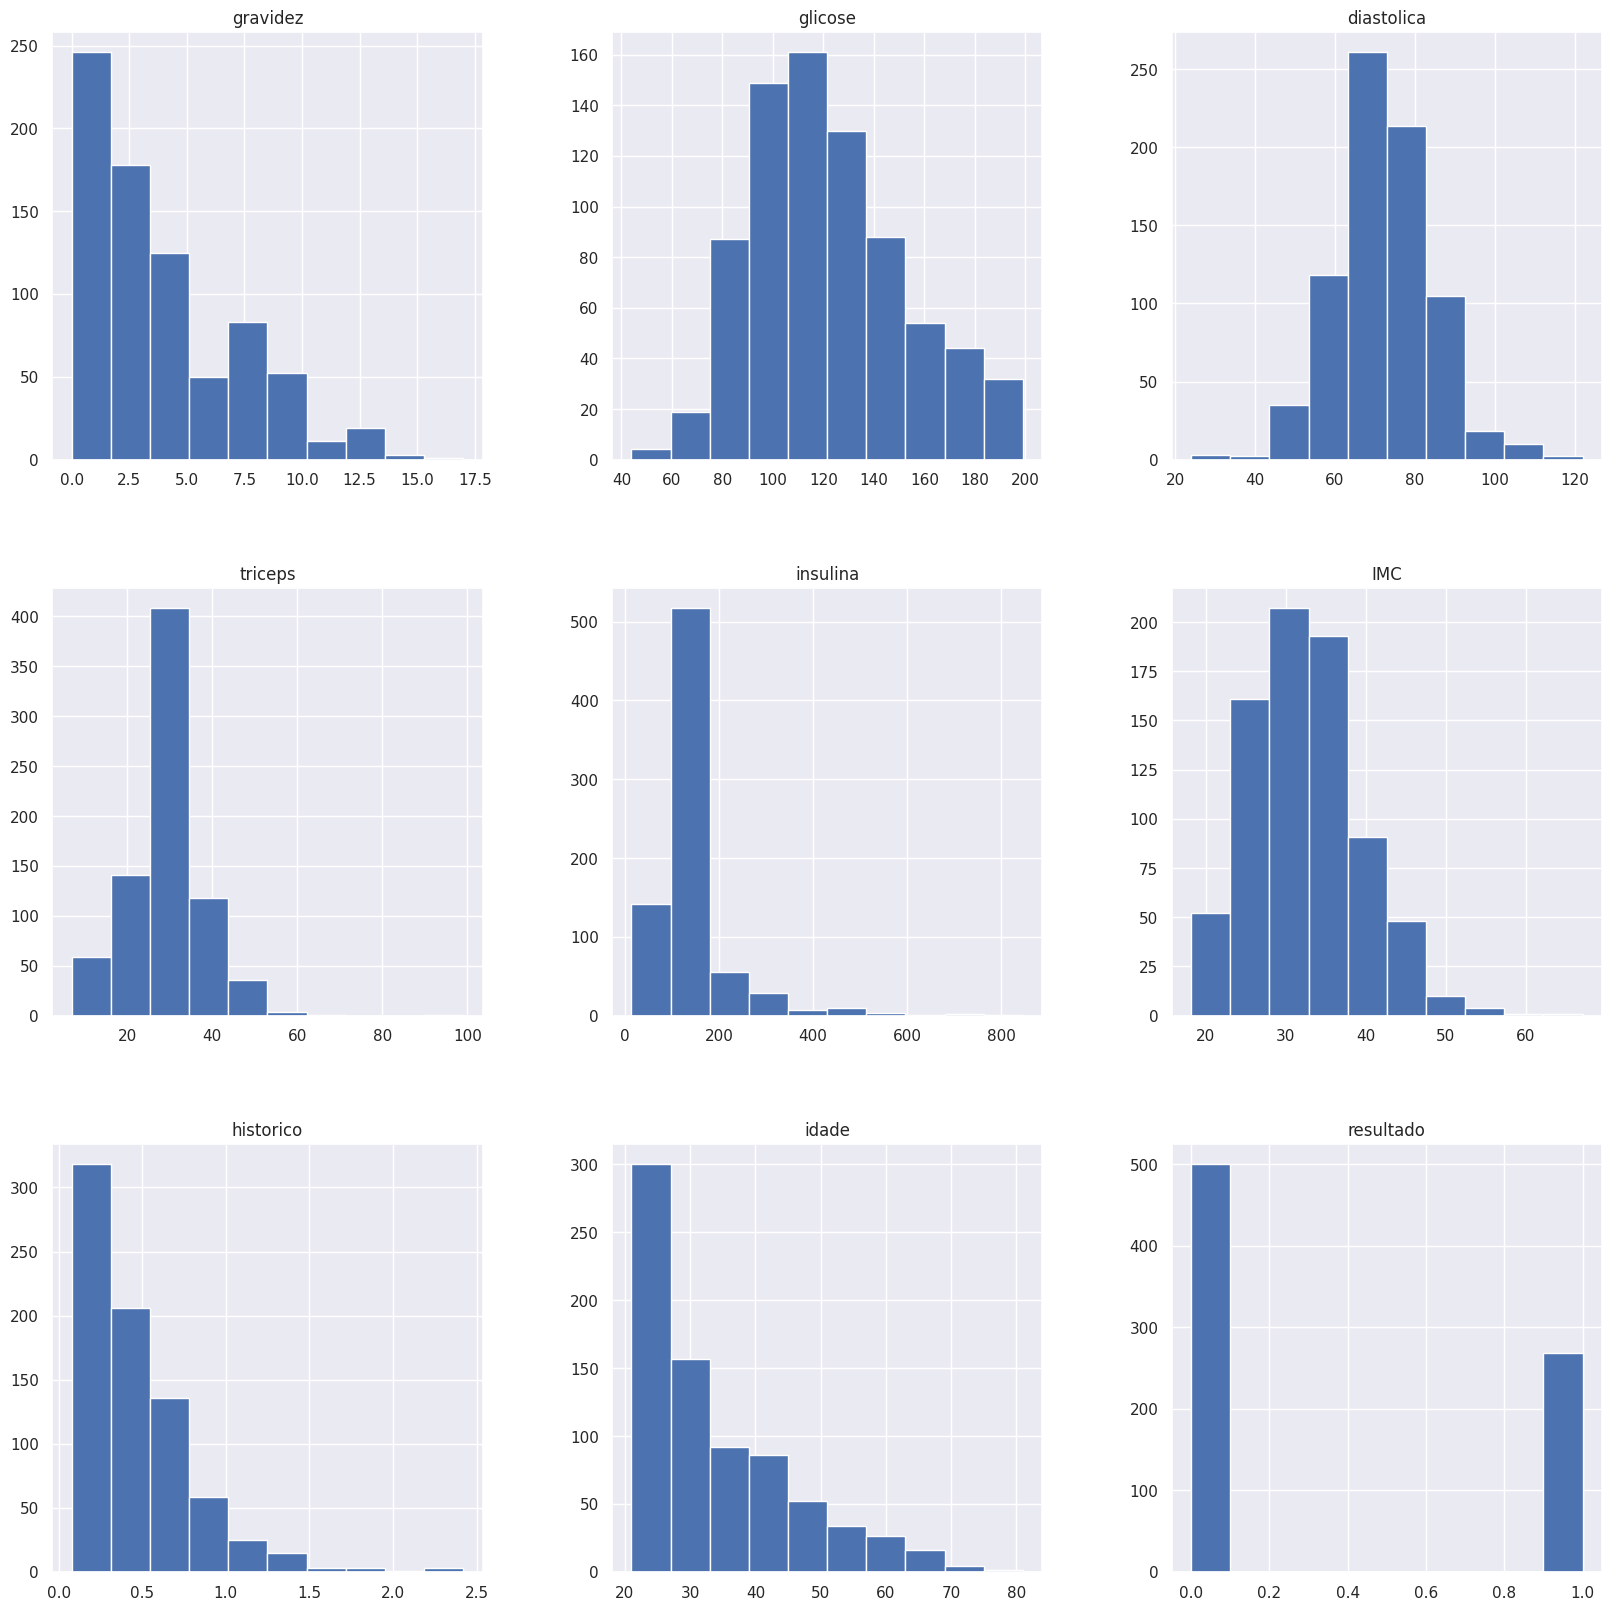

In [ ]:
p = df_copia.hist(figsize = (20,20))

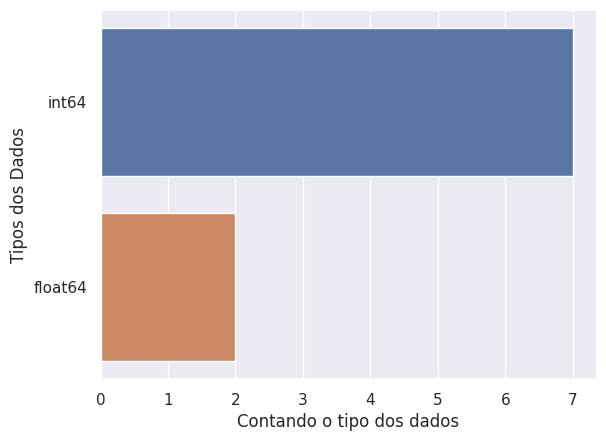

In [ ]:
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("Contando o tipo dos dados")
plt.ylabel("Tipos dos Dados")
plt.show()

0    500
1    500
Name: resultado, dtype: int64


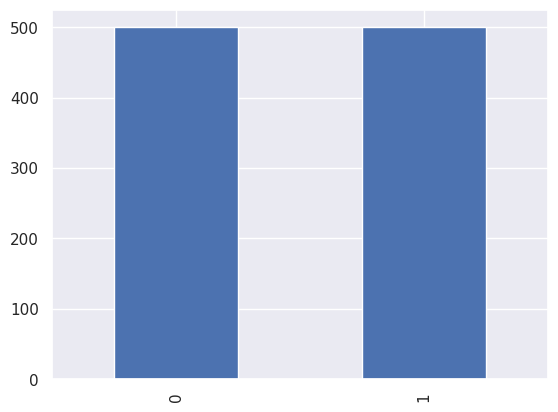

In [ ]:
## Verificando os resultados da base
color_wheel = {1: "#0392cf",
               2: "#7bc043"}
colors = df["resultado"].map(lambda x: color_wheel.get(x + 1))
print(df.resultado.value_counts())
p=df.resultado.value_counts().plot(kind="bar")


In [ ]:
from sklearn.utils import resample
mask = df.resultado == 1
pos_df = df[mask]
nega_df = df[~mask]
df_upsample = resample(pos_df,replace=True,n_samples=len(nega_df),random_state=32,)
df = pd.concat([nega_df, df_upsample])

In [ ]:
df.resultado.value_counts()

0    500
1    500
Name: resultado, dtype: int64

#### A presente base de dados indica que foram poucos os pacientes que realmente estavam com diabetes, sendo que o número de não diabeticos é quase o dobro dos não diabéticos (DataFrame é tendencioso)

#### Correlação de dados

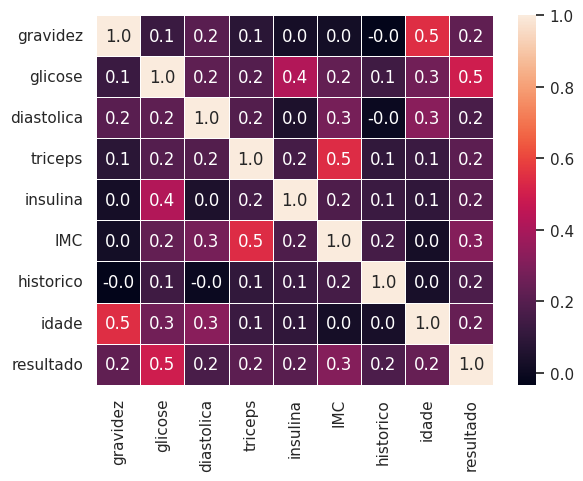

In [ ]:
### Correlação entre as variaveis
correlacao = df_copia.corr(method='pearson')
plot = sns.heatmap(df_copia.corr(method='pearson'), annot = True, fmt=".1f", linewidths=.6)

In [ ]:
df_copia.head()

,gravidez,glicose,diastolica,triceps,insulina,IMC,historico,idade,resultado
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### Mapa de Calor dos dados com as variaveis zeradas

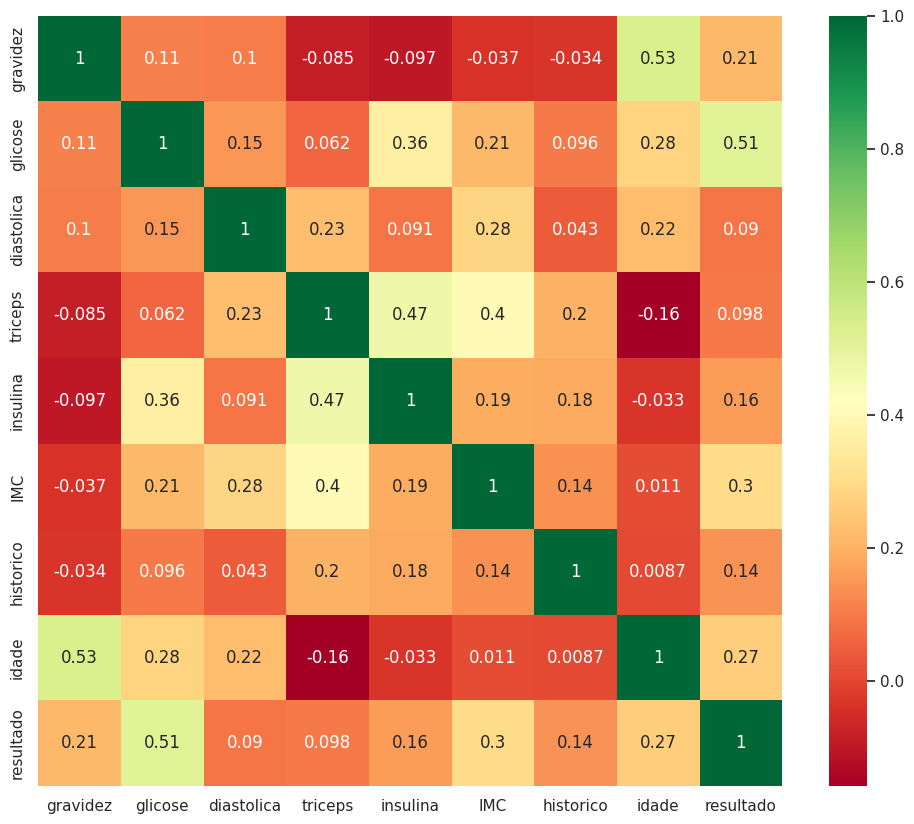

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

#### Mapa de calor dados com dados inseridos nas variaveis zeradas



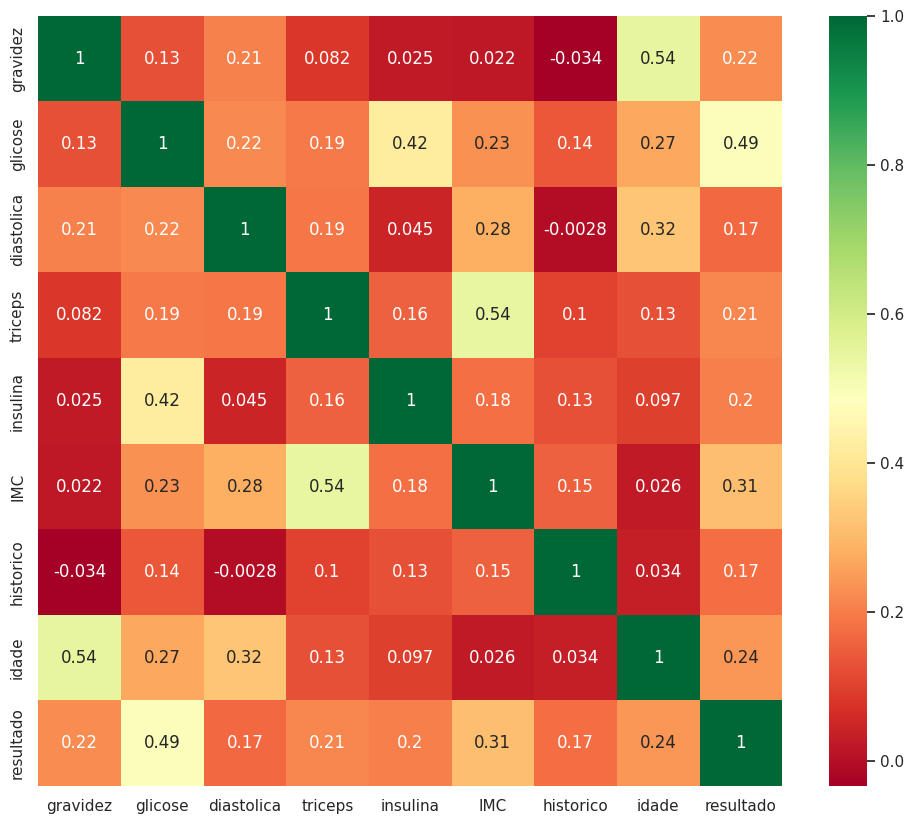

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copia.corr(), annot=True,cmap ='RdYlGn')

###Dividindo as variaveis de entrada(x) e a variavel alvo "target" (y)

In [ ]:
#Variaveis de entrada
df_copia.drop(columns='resultado', axis='1', inplace=True)
X = df
X.head()

,gravidez,glicose,diastolica,triceps,insulina,IMC,historico,idade,resultado
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
#Variavel target
y = df.resultado
y.head()

1     0
3     0
5     0
7     0
10    0
Name: resultado, dtype: int64

###Aplicando algoritmos de Machine Learning

In [ ]:
# Separando os dados em Train e Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

#### Regresão Logistica

In [ ]:
rl = LogisticRegression(random_state=7,max_iter=1000)

In [ ]:
rl.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=7)

In [ ]:
rl.score(X_test, y_test)

1.0

In [ ]:
rl_previsoes = rl.predict(X_test)
rl_previsoes

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0])

In [ ]:
rl_previsoes_prob = rl.predict_proba(X_test)
rl_previsoes_prob

array([[0.98232003, 0.01767997],
       [0.02947963, 0.97052037],
       [0.97500325, 0.02499675],
       [0.97398331, 0.02601669],
       [0.01122715, 0.98877285],
       [0.99014938, 0.00985062],
       [0.00533005, 0.99466995],
       [0.02749427, 0.97250573],
       [0.06263815, 0.93736185],
       [0.98497834, 0.01502166],
       [0.96039801, 0.03960199],
       [0.01025606, 0.98974394],
       [0.04359922, 0.95640078],
       [0.96886118, 0.03113882],
       [0.01720961, 0.98279039],
       [0.99282485, 0.00717515],
       [0.98975193, 0.01024807],
       [0.9688797 , 0.0311203 ],
       [0.01148493, 0.98851507],
       [0.02769367, 0.97230633],
       [0.99215664, 0.00784336],
       [0.01167992, 0.98832008],
       [0.98196641, 0.01803359],
       [0.89673102, 0.10326898],
       [0.01167992, 0.98832008],
       [0.02450263, 0.97549737],
       [0.98186687, 0.01813313],
       [0.01654059, 0.98345941],
       [0.01245489, 0.98754511],
       [0.98529953, 0.01470047],
       [0.

In [ ]:
sns.heatmap(confusion_matrix(y_test, rl_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

ValueError: ignored

Acurácia: é a quantidade de acertos do nosso modelo divido pelo total da amostra.

Precisão: de todos os dados classificados como positivos, quantos são realmente positivos.

Recall: qual a porcentagem de dados classificados como positivos comparado com a quantidade real de positivos que existem em nossa amostra.

F1-score: essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.



In [ ]:
acuracia = accuracy_score(y_test,rl_previsoes)
precisao = precision_score(y_test,rl_previsoes)
recall = recall_score(y_test,rl_previsoes)
f1Score = f1_score(y_test,rl_previsoes)
lr_curva_roc = roc_auc_score(y_test,rl_previsoes)
kappa = cohen_kappa_score(y_test,rl_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}')

Acurácia:1.0
Precisão:1.0
Recall ou Sensibilidade:1.0
F1-Score:1.0
Kappa:1.0
Curva ROC:1.0


#### Modelo KNN

In [ ]:
#Instanciando e treinando o modelo

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.7275449101796407

In [ ]:
knn_previsoes = knn.predict(X_test)
knn_previsoes

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
knn_previsoes_prob = knn.predict_proba(X_test)
knn_previsoes_prob

array([[1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. ,

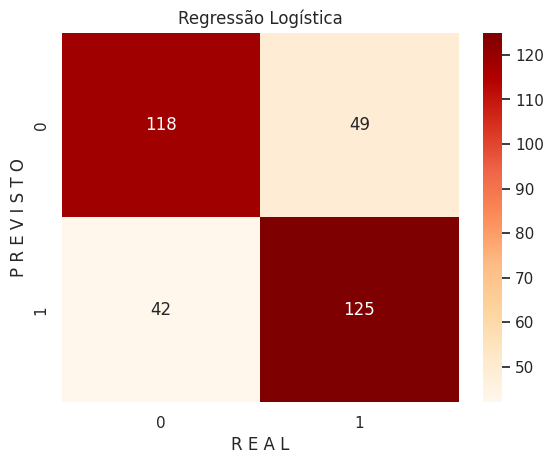

In [ ]:
sns.heatmap(confusion_matrix(y_test, knn_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
acuracia = accuracy_score(y_test,knn_previsoes)
precisao = precision_score(y_test,knn_previsoes)
recall = recall_score(y_test,knn_previsoes)
f1Score = f1_score(y_test,knn_previsoes)
knn_curva_roc = roc_auc_score(y_test,knn_previsoes)
kappa = cohen_kappa_score(y_test,knn_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knn_curva_roc,2)}')

Acurácia:0.73
Precisão:0.72
Recall ou Sensibilidade:0.75
F1-Score:0.73
Kappa:0.46
Curva ROC:0.73


####Árvore de Decisão

In [ ]:
dt = DecisionTreeClassifier(random_state=7, max_depth=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=7)

In [ ]:
dt.score(X_test, y_test)

1.0

In [ ]:
dt_previsoes = dt.predict(X_test)
dt_previsoes

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
dt_previsoes_prob = dt.predict_proba(X_test)
dt_previsoes_prob

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

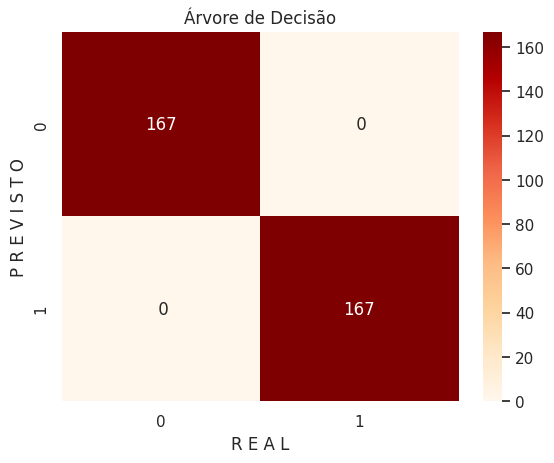

In [ ]:
sns.heatmap(confusion_matrix(y_test, dt_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Árvore de Decisão')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
acuracia = accuracy_score(y_test,dt_previsoes)
precisao = precision_score(y_test,dt_previsoes)
recall = recall_score(y_test,dt_previsoes)
f1Score = f1_score(y_test,dt_previsoes)
dt_curva_roc = roc_auc_score(y_test,dt_previsoes)
kappa = cohen_kappa_score(y_test,dt_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(dt_curva_roc,2)}')

Acurácia:1.0
Precisão:1.0
Recall ou Sensibilidade:1.0
F1-Score:1.0
Kappa:1.0
Curva ROC:1.0


####XGBoost

In [ ]:
xgb = xgb.XGBClassifier(random_state=7)
xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.44002
[1]	validation_0-logloss:0.29937
[2]	validation_0-logloss:0.21051
[3]	validation_0-logloss:0.15096
[4]	validation_0-logloss:0.10969
[5]	validation_0-logloss:0.08049
[6]	validation_0-logloss:0.05955
[7]	validation_0-logloss:0.04437
[8]	validation_0-logloss:0.03331
[9]	validation_0-logloss:0.02519
[10]	validation_0-logloss:0.01922
[11]	validation_0-logloss:0.01480
[12]	validation_0-logloss:0.01152
[13]	validation_0-logloss:0.00907
[14]	validation_0-logloss:0.00724
[15]	validation_0-logloss:0.00586
[16]	validation_0-logloss:0.00480
[17]	validation_0-logloss:0.00399
[18]	validation_0-logloss:0.00336
[19]	validation_0-logloss:0.00287
[20]	validation_0-logloss:0.00287
[21]	validation_0-logloss:0.00287
[22]	validation_0-logloss:0.00287
[23]	validation_0-logloss:0.00287
[24]	validation_0-logloss:0.00287
[25]	validation_0-logloss:0.00287
[26]	validation_0-logloss:0.00287
[27]	validation_0-logloss:0.00287
[28]	validation_0-logloss:0.00287
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=7, ...)

In [ ]:
xgb.score(X_test, y_test)

1.0

In [ ]:
xgb_previsoes = xgb.predict(X_test)
xgb_previsoes

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
xgb_previsoes_prob = xgb.predict_proba(X_test)
xgb_previsoes_prob

array([[0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.0028677 , 0.9971323 ],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.99713236, 0.00286765],
       [0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.0028677 , 0.9971323 ],
       [0.0028677 , 0.9971323 ],
       [0.99713236, 0.00286765],
       [0.

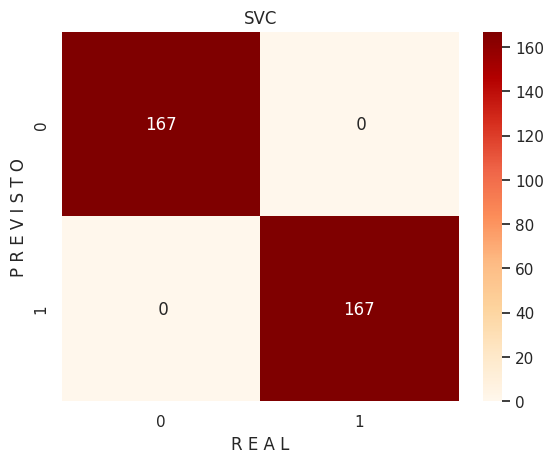

In [ ]:
sns.heatmap(confusion_matrix(y_test, xgb_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

**Executando o Modelo sem o PCA e sem t-SNE**









In [ ]:
# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando as características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo de regressão logística usando as componentes principais
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

# Fazendo as previsões no conjunto de teste
y_pred = classifier.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
lr_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}')

Acurácia:1.0
Precisão:1.0
Recall ou Sensibilidade:1.0
F1-Score:1.0
Kappa:1.0
Curva ROC:1.0


**Executando o Modelo com o PCA**

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando a escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduzindo a dimensionalidade para 2 componentes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Treinando o modelo
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)


#Realizando predição utilizando o PCA
y_pred = classifier.predict(X_test_pca)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        96
           1       0.85      0.85      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)
lr_curva_roc = roc_auc_score(y_test,y_pred)
kappa = cohen_kappa_score(y_test,y_pred)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}')

Acurácia:0.84
Precisão:0.85
Recall ou Sensibilidade:0.85
F1-Score:0.85
Kappa:0.68
Curva ROC:0.84


**Executando o Modelo com o t-SNE**



In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando a escala dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando o t-SNE para redução de dimensionalidade (por exemplo, 2 componentes)
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Treinando o modelo de classificação
classifier = LogisticRegression()
classifier.fit(X_train_tsne, y_train)

# Avaliando o desempenho do modelo, por exemplo, com métricas de avaliação de classificação
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia do Modelo: {accuracy:.2f}')
print('Relatório de Classificação:\n', report)

Acurácia do Modelo: 0.84
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        96
           1       0.85      0.85      0.85       104

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1Score = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
lr_curva_roc = roc_auc_score(y_test, y_pred)

# Imprima as métricas
print(f'Acurácia: {round(acuracia, 2)}')
print(f'Precisão: {round(precisao, 2)}')
print(f'Recall ou Sensibilidade: {round(recall, 2)}')
print(f'F1-Score: {round(f1Score, 2)}')
print(f'Kappa: {round(kappa, 2)}')
print(f'Curva ROC: {round(lr_curva_roc, 2)}')

Acurácia: 0.84
Precisão: 0.85
Recall ou Sensibilidade: 0.85
F1-Score: 0.85
Kappa: 0.68
Curva ROC: 0.84
